In [4]:
import os, sys 
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import numpy as np
import utility as ut
import matplotlib.pyplot as plt
import pandas as pd
import glob, json
from scipy import stats
import seaborn as sns
import oneshot as sm
import rfm, skipRFM, localRFM, localSkip, deepSkip, deepRFM, localDeepRFM, localDeepSkip, localDeepSkipN
# import parallel_euler as arch1
import torch, time
from torch import nn
import config
import count_params as cp
# warnings.filterwarnings('ignore'

dynamical_system = 'KS'
L = 200
# Uo = torch.tensor(np.load(f'../data/{dynamical_system}/train.npy'))[:,:100000]
# Vo = torch.tensor(np.load(f'../data/{dynamical_system}/test.npy'))
Uo = torch.tensor(np.load(f'../data/{dynamical_system}-{L}/train.npy'))[:,:100000]
Vo = torch.tensor(np.load(f'../data/{dynamical_system}-{L}/test.npy'))
# Uo = torch.tensor(ks0.ks32(dt=0.01, tmax=300)[:, 4000:-1000])

L0, L1 = 0.4, 3.5
D, D_r, B = 3, 128, 1
beta = 1e-5
data_folder = '../data'
G, I = 8, 1                                                                                            
normalize = True

if normalize:
    # mean, std = Uo.mean(), Uo.std()
    # Uo = (Uo - mean) / std
    # Vo = (Vo - mean) / std
    # Uo *= 10
    # Vo *= 10 
    # mean, std = Uo.min(), Uo.max() - Uo.min()
    # Uo = (Uo - mean) / std
    # Vo = (Vo - mean) / std
    Uo += 0.000*torch.randn(size=Uo.shape)
# drf_args = [2048, 2, L0, L1, Uo, beta, 'LocalSkip', f'{data_folder}/temp/localSkipKS/depth-{B}', False, G, I]
# batch = localDeepSkipN.BatchDeepRF(Uo, Vo, *drf_args)
# start = time.time()
# batch.drf.learn(Uo + 0.001*torch.randn(size=Uo.shape), 42)
# end = time.time()
# print(f"Time taken = {end-start}s")
# kwargs = {200:{'error_threshold': 0.25, 'dt': 0.25, 'Lyapunov_time': 1/0.094},\
#           22:{'error_threshold' : 0.25, 'dt': 0.25, 'Lyapunov_time': 1/0.043},\
#           12:{'error_threshold' : 0.25, 'dt': 0.25, 'Lyapunov_time': 1/0.003},\
#          '13_5':{'error_threshold' : 0.25, 'dt': 0.25, 'Lyapunov_time': 1/0.059},\
#          '200-001':{'error_threshold': 0.25, 'dt': 0.001, 'Lyapunov_time': 1/0.094},}
kwargs = {'error_threshold': 0.25, 'dt': 0.01, 'Lyapunov_time': 1/2.27}
# tau = drf.compute_tau_f(Vo[:100], **)
# tau = drf.compute_tau_f(Vo[:100], **{'error_threshold' : 0.09, 'dt': 0.01, 'Lyapunov_time': 1/2.27})
# tau[0].mean()
# batch.get_tau_f(batch.drf, Uo, **kwargs[L])
# eval = batch.drf.multistep_forecast(Vo[0][:, 0], 150000)
# std = Vo[0].std(axis=1)
# diff = ((Vo[0][:, :] - eval[:, :])**2 / std[:, None]**2).mean(axis=0)
# plt.plot(np.arange(len(diff)), diff)
# plt.axhline(0.25)
# print(batch.drf.compute_tau_f(Vo[:10], **kwargs)[0].mean())

FileNotFoundError: [Errno 2] No such file or directory: '../data/KS-200/train.npy'

In [ ]:
print(batch.drf.compute_tau_f(Vo, **kwargs[L])[0].mean())

In [ ]:
i = np.random.randint(100000-1000)
ut.waterfall(Uo[:, i:i+5000], filename=f"KS-{L}-train-partial", levels=50,  **kwargs[L])

In [ ]:
i = np.random.randint(1)
ut.waterfall(Vo[i][:, :5000], filename=f"KS-{L}-test", levels=50,  **kwargs[L])

In [ ]:
im = plt.matshow(np.cov(Uo)[:20, :20], cmap='bwr')
plt.colorbar(im)
plt.savefig(f"../data/plots/KS-{L}-cov-partial.png", bbox_inches='tight', dpi=300)

In [ ]:
D, l, t = 48, 1, 25000
plt.plot(range(D), Vo[0][:, t], label="Truth")
plt.plot(range(D), eval[:, t], label="Prediction")
plt.legend()

In [ ]:
for D_r, B in [[1024, 1], [1024, 2], [1024, 4], [1024, 8], [1024, 16], [4096, 1], [4096, 2], [4096, 4], [4096, 8]]:
    data = ut.get_data('L63', 1, 'DeepSkip', D_r, B)
    y = data['tau_f_nmse'].min()
    print(f'{D_r}, {B}, {y}')

for D_r, B in [[512, 1], [1024, 1], [2048, 1], [4096, 1], [8192, 1], [16384, 1]]:
    data = ut.get_data('L63', 1, 'SkipRFM', D_r, B)
    y = data['tau_f_nmse'].min()
    print(f'{D_r}, {B}, {y}')

for D_r, B in [[512, 1], [1024, 1], [2048, 1], [4096, 1], [8192, 1], [16384, 1]]:
    data = ut.get_data('L63', 1, 'RFM', D_r, B)
    y = data['tau_f_nmse'].min()
    print(f'{D_r}, {B}, {y}')

(array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   1.,   0.,   2.,   2.,   1.,   1.,   2.,   3.,
           2.,   1.,   3.,   5.,   4.,   8.,   7.,  11.,  11.,  20.,  23.,
          22.,  34.,  31.,  35.,  56.,  53.,  67.,  64.,  72.,  96.,  92.,
         102., 103.,  81., 116., 106.,  99.,  93.,  85.,  66.,  60.,  69.,
          43.,  46.,  42.,  37.,  25.,  23.,  24.,  12.,  19.,  15.,   6.,
           5.,   4.,   9.,   6.,   2.,   4.,   2.,   1.,   1.,   1.,   0.,
           2.,   2.,   1.,   0.,   1.,   2.,   2.,   0.,   0.,   0.,   0.,
           0.],
        [  1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
           0.,   0.,   2.,   3.,   1.,   0.,   4.,   2.,   1.,   2.,   3.,
           1.,   2.,   7.,   4.,  10.,  17.,  11.,  16.,  13.,  22.,  28.,
         

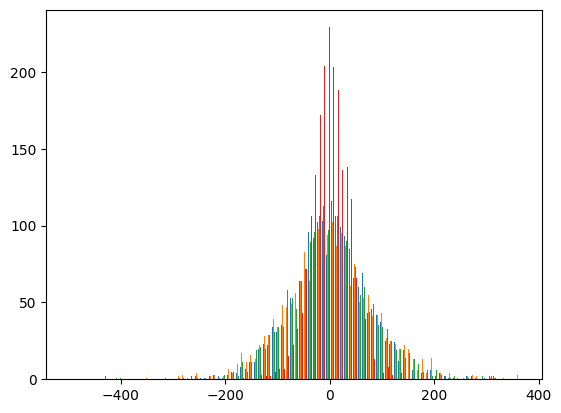

In [23]:
plt.hist(batch.drf.net.outer[0].weight.detach(), bins=100)

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 2., 1., 0., 0., 0., 3., 1.,
        1., 0., 0., 3., 0., 1., 3., 3., 0., 0., 2., 5., 0., 1., 1., 0., 2.,
        0., 2., 2., 2., 4., 0., 5., 2., 3., 6., 1., 5., 4., 3., 1., 6., 1.,
        2., 1., 1., 1., 1., 2., 0., 0., 1., 1., 3., 3., 0., 2., 1., 3., 1.,
        0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 2.]),
 array([-3.26411832, -3.21082461, -3.15753091, -3.1042372 , -3.0509435 ,
        -2.99764979, -2.94435608, -2.89106238, -2.83776867, -2.78447497,
        -2.73118126, -2.67788756, -2.62459385, -2.57130015, -2.51800644,
        -2.46471273, -2.41141903, -2.35812532, -2.30483162, -2.25153791,
        -2.19824421, -2.1449505 , -2.09165679, -2.03836309, -1.98506938,
        -1.93177568, -1.87848197, -1.82518827, -1.77189456, -1.71860086,
        -1.66530715, -1.61201344, -1.55871974, -1.50542603, -1.45213233,
        -1.39883862, -1.34554492, -1.29

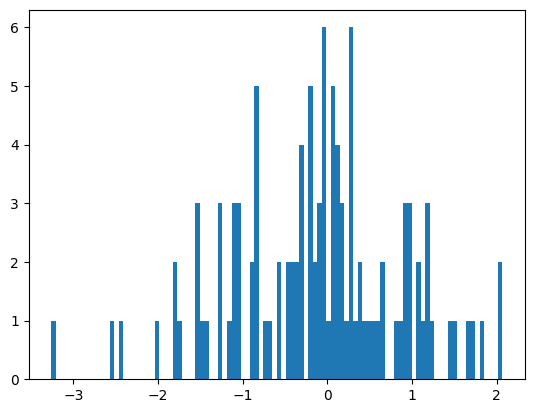

In [70]:
a = np.random.normal(size=100) * 1e-5
b = np.random.normal(size=10)
c = np.hstack((a, b))
plt.hist(c+np.random.normal(size=len(c)), bins=100)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0., 100.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          1.]),
 array([-7.27206619e+00, -7.18936210e+00, -7.10665801e+00, -7.02395392e+00,
        -6.94124984e+00, -6.85854575e+00, -6.77584166e+00, -6.69313757e+00,
        -6.61043348e+00, -6.52772940e+00, -6.44502531e+00, -6.36232122e+00,
        -6.27961713e+00, -6.19691304e+00, -6.11420896e+00, -6.03150487e+00,
        -5.948

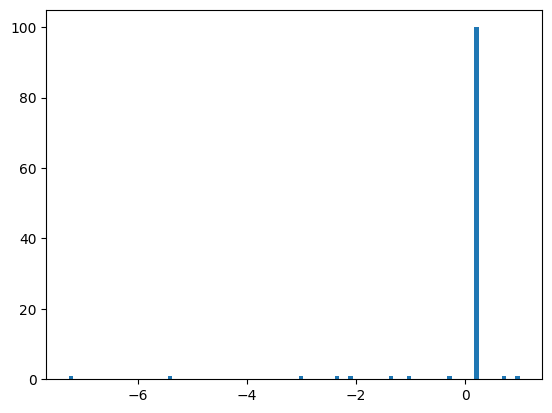

In [69]:
plt.hist((c-c.mean())/c.std(), bins=100)

In [15]:
h = torch.randn(3, device='cpu')[None, :].repeat_interleave(4, dim=0)[None, :].repeat_interleave(5, dim=0)

In [44]:
x, y = batch.drf.learn_(Uo + 0.000*torch.randn(size=Uo.shape), 42)

/var/folders/v9/pbbcbpgd4mj4sbplbm4ht36r0000gq/T/ipykernel_2321/2840175149.py:1: RuntimeWarning: invalid value encountered in log10
  plt.hist(np.log10(y[0]), bins=100);


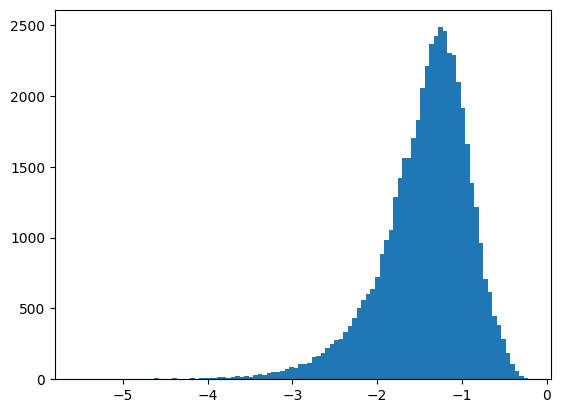

In [45]:
plt.hist(np.log10(y[0]), bins=100);

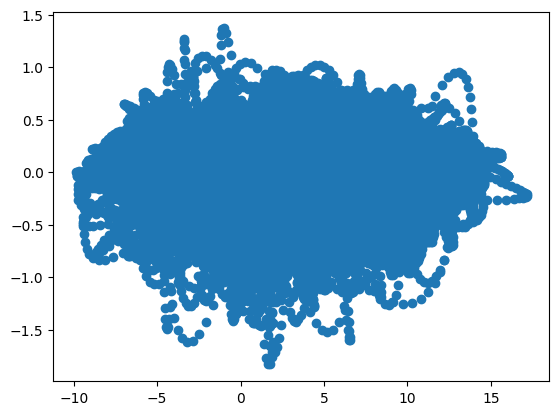

In [12]:
plt.scatter(x[0], y[0])

In [14]:
torch.cov(y)

tensor([[ 0.0701, -0.0004, -0.0143, -0.0072],
        [-0.0004,  0.0707, -0.0004, -0.0149],
        [-0.0143, -0.0004,  0.0703,  0.0005],
        [-0.0072, -0.0149,  0.0005,  0.0719]])

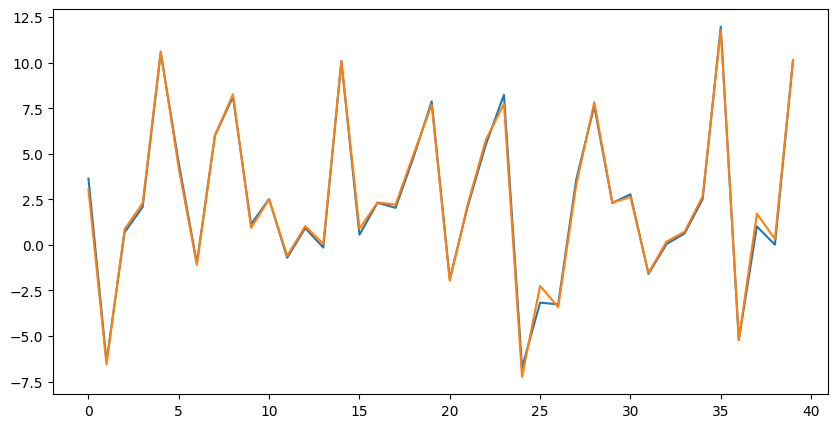

In [19]:
u = np.load(f'../data/L96/train.npy')
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.plot(u[:, 1000])
ax.plot(u[:, 1001])


In [50]:
for file in glob.glob('../data/temp/*/*/config.json'):
    with open(file, 'r') as json_file:
        c = json_file.read().split('}')[0]+'}'
        print(c)
    with open(file, 'w') as json_file:
        json_file.write(c)

{
  "D": 40,
  "D_r": 2048,
  "B": 1,
  "name": "LocalSkip",
  "L0": 0.4,
  "L1": 3.5,
  "beta": 5e-06,
  "normalize": false

}
{
  "D": 40,
  "D_r": 2048,
  "B": 1,
  "name": "LocalSkip",
  "L0": 0.4,
  "L1": 3.5,
  "beta": 1e-05,
  "normalize": false

}
{
  "D": 512,
  "D_r": 2048,
  "B": 1,
  "name": "LocalSkip",
  "L0": 0.4,
  "L1": 3.5,
  "beta": 1e-05,
  "normalize": false

}
{
  "D": 512,
  "D_r": 2048,
  "B": 1,
  "name": "LocalSkip",
  "L0": 0.4,
  "L1": 3.5,
  "beta": 1e-05,
  "normalize": false

}
{
  "D": 512,
  "D_r": 2048,
  "B": 1,
  "name": "LocalSkip",
  "L0": 0.4,
  "L1": 3.5,
  "beta": 1e-05,
  "normalize": false

}
{
  "D": 40,
  "D_r": 2048,
  "B": 1,
  "name": "LocalSkip",
  "L0": 0.4,
  "L1": 3.5,
  "beta": 1e-05,
  "normalize": false

}
{
  "D": 512,
  "D_r": 2048,
  "B": 1,
  "name": "LocalSkip",
  "L0": 0.4,
  "L1": 3.5,
  "beta": 1e-06,
  "normalize": false

}
{
  "D": 40,
  "D_r": 2048,
  "B": 1,
  "name": "LocalSkip",
  "L0": 0.4,
  "L1": 3.5,
  "beta": 5e-

In [39]:
a = '{445}{545}{77}'
a.split('}')

['{445', '{545', '{77', '']

In [6]:
Uo.std()

tensor(1.3126)

In [8]:
((Uo - Uo.min())/ (Uo.max()-Uo.min())).std()

tensor(0.1798)

In [14]:
0.2*1.3

0.26

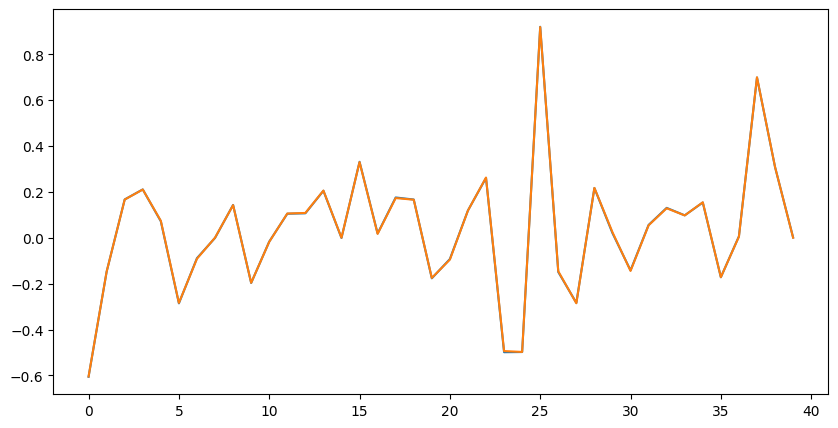

In [15]:
u = np.load(f'../data/L96/train.npy') 
v = u + 0.001*np.random.normal(size=u.shape)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.plot(u[0:512, 1001] - u[0:512, 1000])
ax.plot(v[0:512, 1001] - v[0:512, 1000])
# ax.plot(u[:24, 1001])

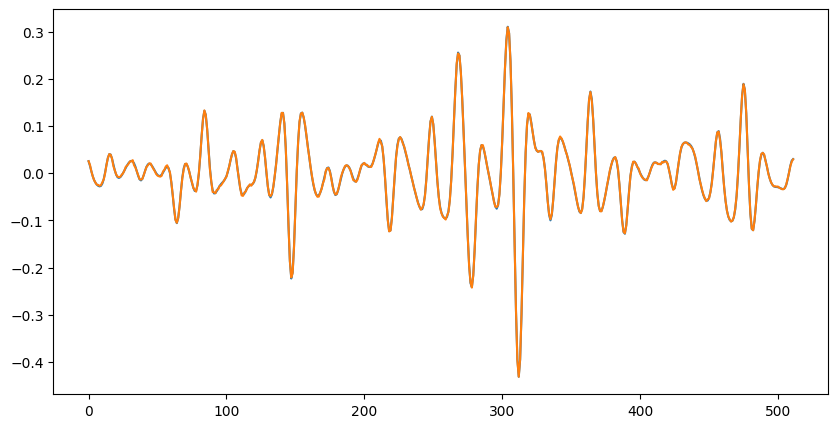

In [16]:
u = np.load(f'../data/KS-200/train.npy') 
v = u + 0.001*np.random.normal(size=u.shape)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.plot(u[0:512, 1001] - u[0:512, 1000])
ax.plot(v[0:512, 1001] - v[0:512, 1000])
# ax.plot(u[:24, 1001])

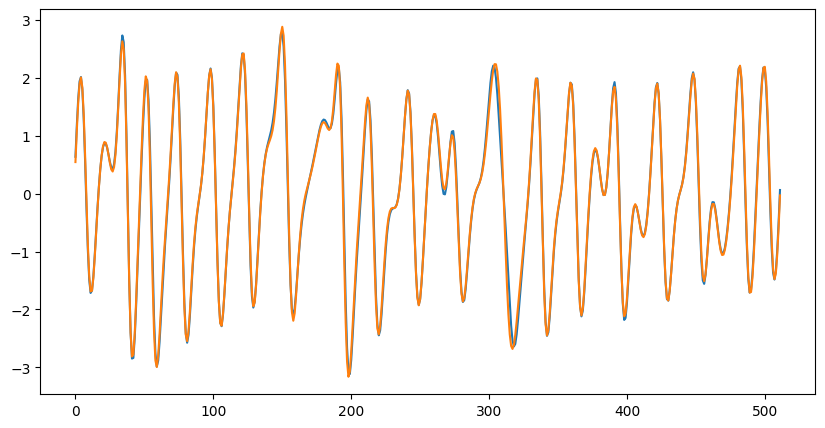

In [38]:
u = np.load(f'../data/KS-200/train.npy') 
v = u + 0.001*np.random.normal(size=u.shape)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.plot(u[0:512, 2000])# - u[0:512, 1000])
ax.plot(u[0:512, 2001])# - v[0:512, 1000])
# ax.plot(u[:24, 1001])

In [4]:
tau = pd.read_csv('../data/L96/config_1_s/LocalDeepSkip_1_4/D_r-16384_B-2/batch_data.csv')["tau_f_nmse"].mean()

In [5]:
import count_params as cp

6.918778400000001

In [32]:
cp.LocalDeepRFM(512, 7000, 2, 1, 10)

336000

In [18]:
cp.LocalDeepRFM(512, 4096, 2, 8, 1)

335872

In [34]:
Uo.shape

torch.Size([512, 100000])

In [35]:
drf_args = [4096, 2, L0, L1, Uo, beta, 'LocalSkip', f'{data_folder}/temp/localSkipKS/depth-{B}', False, 8, 1]
batch = localDeepRFM.BatchDeepRF(Uo, Vo, *drf_args)
batch.drf.count_params()

335872

In [37]:
drf_args = [7000, 2, L0, L1, Uo, beta, 'LocalSkip', f'{data_folder}/temp/localSkipKS/depth-{B}', False, 1, 10]
batch = localDeepRFM.BatchDeepRF(Uo, Vo, *drf_args)
batch.drf.count_params()

336000

In [54]:
s = "LocalDeepSkipN_8_1"
f"{s[:-4]}$_{{{s[-3:].replace('_', ',')}}}$"

'LocalDeepSkipN$_{8,1}$'

In [5]:
Uo.dtype

torch.float64

In [ ]:
import wasserstein as w2

x = torch.randn(size=(30000, 3))
y = 2 * torch.randn(size=(30000, 3))
w2.sinkhorn_div(x, y)

In [4]:
torch.sum(torch.abs(, axis=2)

tensor([[2626.5184, 2648.0785, 2605.1714,  ..., 2568.8745, 2490.1287,
         2751.1178],
        [2463.2678, 2552.2055, 2507.7615,  ..., 2521.6364, 2623.2610,
         2897.2106],
        [2672.4466, 2629.0215, 2539.8190,  ..., 2500.3498, 2514.7811,
         2818.7509],
        ...,
        [2528.1226, 2565.1462, 2540.7867,  ..., 2574.1697, 2535.0376,
         2791.0584],
        [2577.4044, 2707.1403, 2441.9903,  ..., 2666.8960, 2437.4032,
         2805.0359],
        [2552.4982, 2673.1463, 2584.1942,  ..., 2400.6665, 2522.4546,
         2733.4288]])

In [6]:
((torch.unsqueeze(x, 1) - torch.unsqueeze(y, 0))**2).shape

torch.Size([1000, 1000, 512])

In [10]:
x = torch.randn(size=(10000, 512))
y = 2 * torch.randn(size=(10000, 512))
torch.cdist(x, y).shape

torch.Size([10000, 10000])

In [7]:
np.sqrt(512)

22.627416997969522

In [3]:
Uo.device

device(type='cpu')